In [14]:
import numpy as np
import matplotlib.pyplot as plt

h   = 6.62607015e-34     # Planck constant (J s)
c   = 2.99792458e8       # speed of light (m/s)
kB  = 1.380649e-23       # Boltzmann constant (J/K)

T_array = [50,100,200,400,800]  # temperature in Kelvin
lambda_array = np.linspace(1e-7, 3e-6, 2000)   # wavelength range


# Wein's Spectral Law
The short-wavelength approximation of blackbody radiation is
$$
u_\lambda(\lambda,T)
=
\frac{8\pi hc}{\lambda^5}
\exp\!\left(-\frac{hc}{\lambda k_B T}\right).
$$


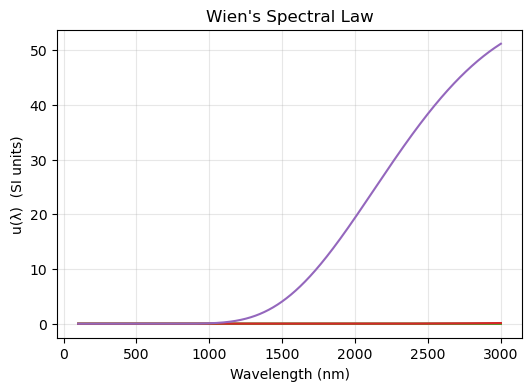

In [15]:
def wien_lambda(lambda_, T):
    return (8*np.pi*h*c / lambda_**5) * np.exp(-h*c/(lambda_*kB*T))

plt.figure(figsize=(6,4))
for T in T_array:
  plt.plot(lambda_array*1e9, wien_lambda(lambda_array, T))
plt.xlabel("Wavelength (nm)")
plt.ylabel("u(λ)  (SI units)")
plt.title("Wien's Spectral Law")
plt.grid(alpha=0.3)
plt.show()


## Rayleigh–Jeans Law
The long-wavelength classical limit is

$$
u_\lambda(\lambda,T)
=
\frac{8\pi k_B T}{\lambda^4}.
$$


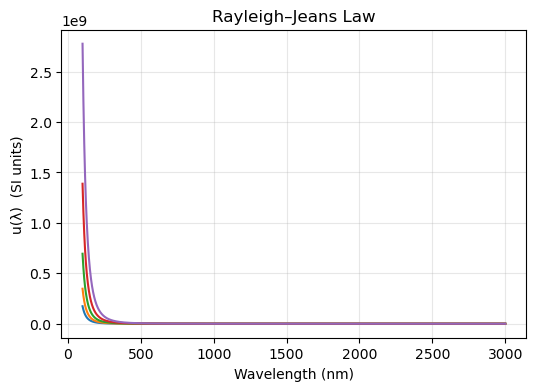

In [16]:
def rayleigh_jeans(lambda_, T):
    return 8*np.pi*kB*T / lambda_**4

plt.figure(figsize=(6,4))
for T in T_array:
  plt.plot(lambda_array*1e9, rayleigh_jeans(lambda_array, T))
plt.xlabel("Wavelength (nm)")
plt.ylabel("u(λ)  (SI units)")
plt.title("Rayleigh–Jeans Law")
plt.grid(alpha=0.3)
plt.show()


## Planck’s Law
The exact spectral density of blackbody radiation is

$$
u_\lambda(\lambda,T)
=
\frac{8\pi hc}{\lambda^5}
\frac{1}{\exp\!\left(\frac{hc}{\lambda k_B T}\right)-1}.
$$



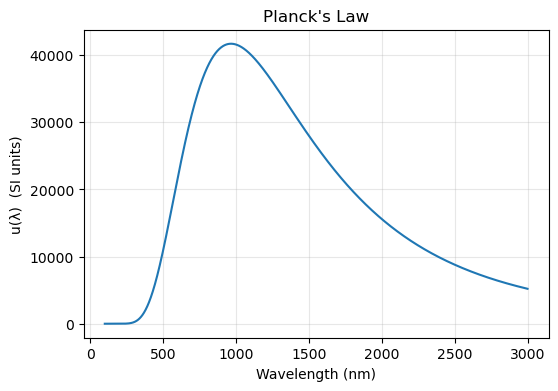

In [8]:
def planck_lambda(lambda_, T):
    return (8*np.pi*h*c / lambda_**5) / (np.exp(h*c/(lambda_*kB*T)) - 1)

plt.figure(figsize=(6,4))
plt.plot(lambda_*1e9, planck_lambda(lambda_, T))
plt.xlabel("Wavelength (nm)")
plt.ylabel("u(λ)  (SI units)")
plt.title("Planck's Law")
plt.grid(alpha=0.3)
plt.show()


### Stefan–Boltzmann Law
The total radiated power per unit area is

$$
j^\star = \sigma T^4.
$$


# Combined Plots

/var/folders/42/g1m9r43x2_v4bkyg4csrsn100000gn/T/ipykernel_69358/3166549644.py:2: RuntimeWarning: overflow encountered in exp
  return (8*np.pi*h*c / lambda_**5) / (np.exp(h*c/(lambda_*kB*T)) - 1)


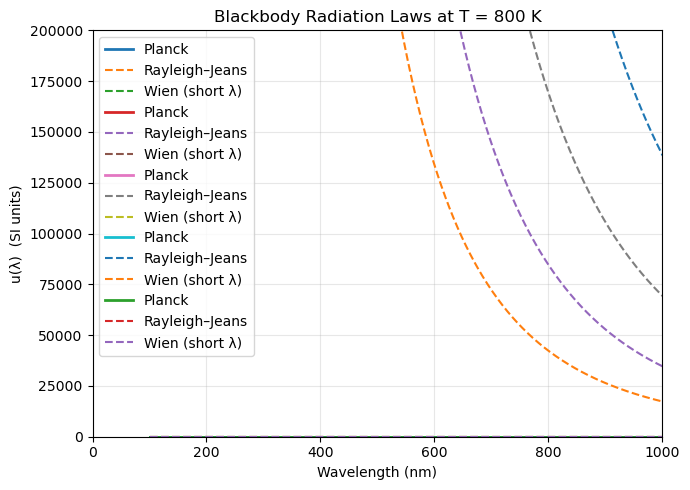

In [21]:
plt.figure(figsize=(7,5))
for T in T_array:
  plt.plot(lambda_array*1e9, planck_lambda(lambda_array, T), label="Planck", lw=2)
  plt.plot(lambda_array*1e9, rayleigh_jeans(lambda_array, T), '--', label="Rayleigh–Jeans")
  plt.plot(lambda_array*1e9, wien_lambda(lambda_array, T), '--', label="Wien (short λ)")

plt.xlabel("Wavelength (nm)")
plt.ylabel("u(λ)  (SI units)")
plt.xlim([0,1000])
plt.ylim([0,2e5])
plt.title(f"Blackbody Radiation Laws at T = {T} K")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
